[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [27]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Import my library
import PortfolioAnalyser as pa

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

In [2]:
# Downloading funds and creating quotes and returns dataframes

# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

ISINs = ['DE000A0X7541', 'LU1038809395']
Nomes = ['Acatis'      , 'FvS']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()

In [28]:
#### Normalization to 100 ####
fundos = round((fundos / fundos.iloc[0] * 100), 2)

# Comparação entre Acatis Gané e FvS Multiple Opportunities II

In [4]:
Begin = fundos.head(1).index
Begin = str(Begin.strftime('%Y-%m-%d'))[8:18]

**Dica:** A interactividade dos gráficos da plotly permite:

    . Zoom (mantenham o clique e arrastem o cursor em simultâneo, em cima do gráfico);
    . Tem uma lista de opções que aparece se forem com o cursor ao canto superior direito;
    . Façam duplo clique no gráfico ou seleccionem a opção Autoscale/Reset Axes para voltar ao normal;
    . Alterem a opção de 'Compare data on hoover' para 'Show closest data on hoover' se vos for mais conveniente;
    . Se clicarem num nome na legenda esse fundo desaparece (clicando de novo ele volta a apetecer).

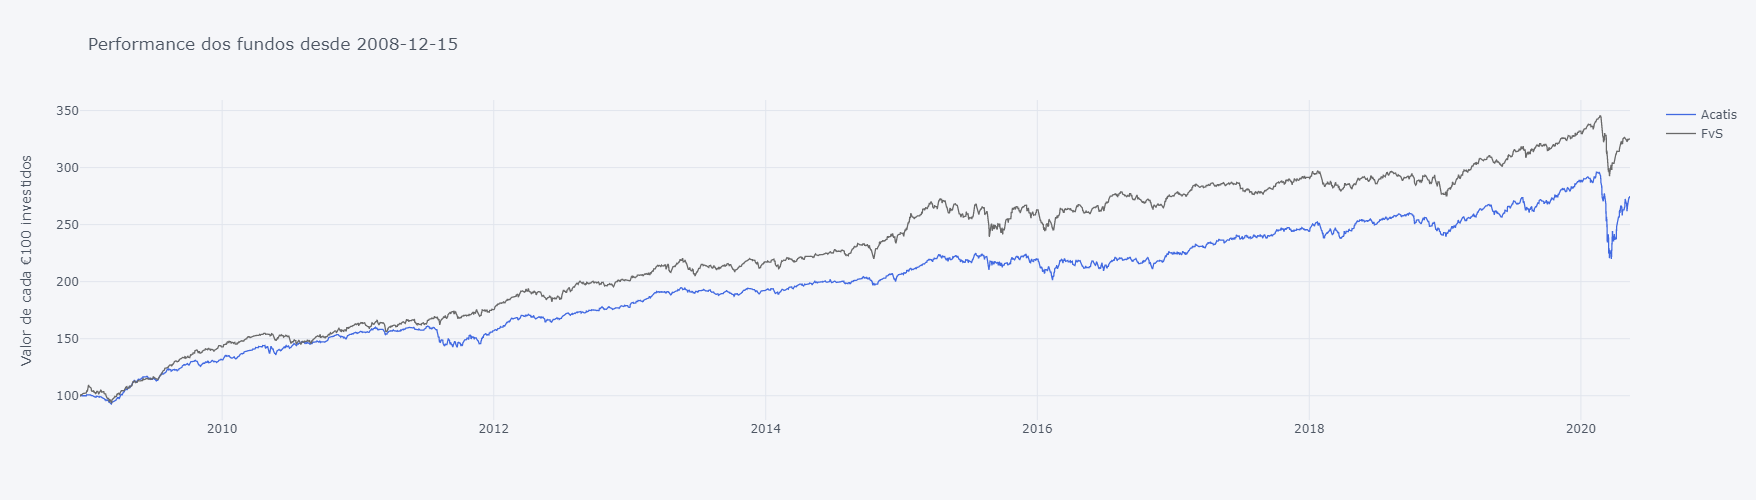

In [5]:
# Making Color Palette
Palette = ['rgb(255, 153, 51)',     # 1 - orange
            'royalblue',            # 2 - Royalblue
            '#708090',              # 3 - Grey
            'rgb(128, 0, 128)',     # 4 - Indigo
            'rgb(219, 64, 82)',     # 5 - Red
            'rgb(0, 128, 128)',     # 6 - Teal
            '#191970',              # 7 - Navy
            'rgb(128, 128, 0)',     # 8 - Olive
            '#00BFFF',              # 9 - Water Blue
            'rgb(128, 177, 211)']   # 10 - 

fundos.iplot(title='Performance dos fundos desde ' + Begin, yTitle='Valor de cada €100 investidos', color=['royalblue', 'dimgrey'], dimensions=pa.dimensions)

In [6]:
pa.print_title('Valores finais dos fundos tendo começado em ' + Begin + ' com 100 euros')
fundos.tail(1)

**Valores finais dos fundos tendo começado em 2008-12-15 com 100 euros**

,Acatis,FvS
Date,,
2020-05-12,274.99,325.28


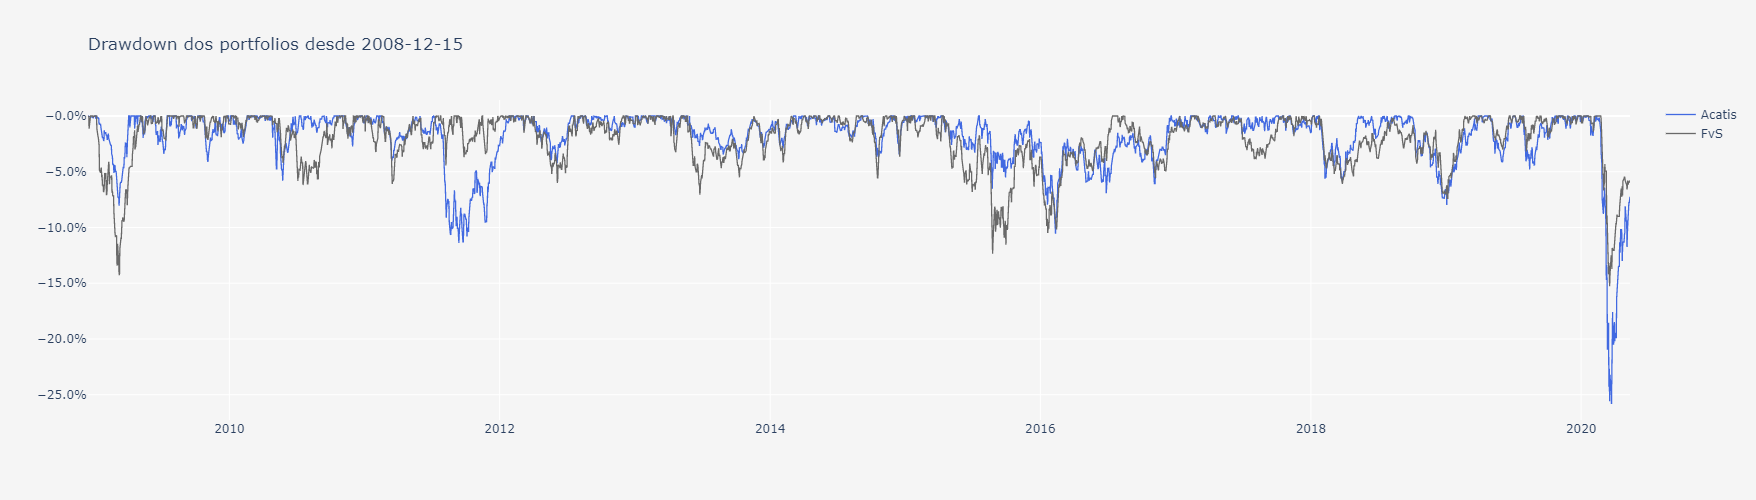

In [7]:
DD = pa.compute_drawdowns(fundos)
DD = DD /100

layout = go.Layout(
    title='Drawdown dos portfolios desde ' + Begin,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='',
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        zeroline=True, # Adicionar ou não a zero line
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 0],
    name = fundos.columns[0],
    line = dict(
        color = 'royalblue',
        width = 1.3)
)

trace1 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 1],
    name = fundos.columns[1],
    line = dict(
        color = 'dimgrey',
        width = 1.3)
)

data = [trace0, trace1]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [8]:
pa.print_title('Drawdown actual (' + str(DD.iloc[-1].name)[0:10] + ')')
DD = pa.compute_drawdowns(fundos)
DD = DD /100
round(DD.tail(1), 5).applymap(lambda x: "{0:.2f}%".format(x*100))

**Drawdown actual (2020-05-12)**

,Acatis,FvS
Date,,
2020-05-12,-7.26%,-5.78%


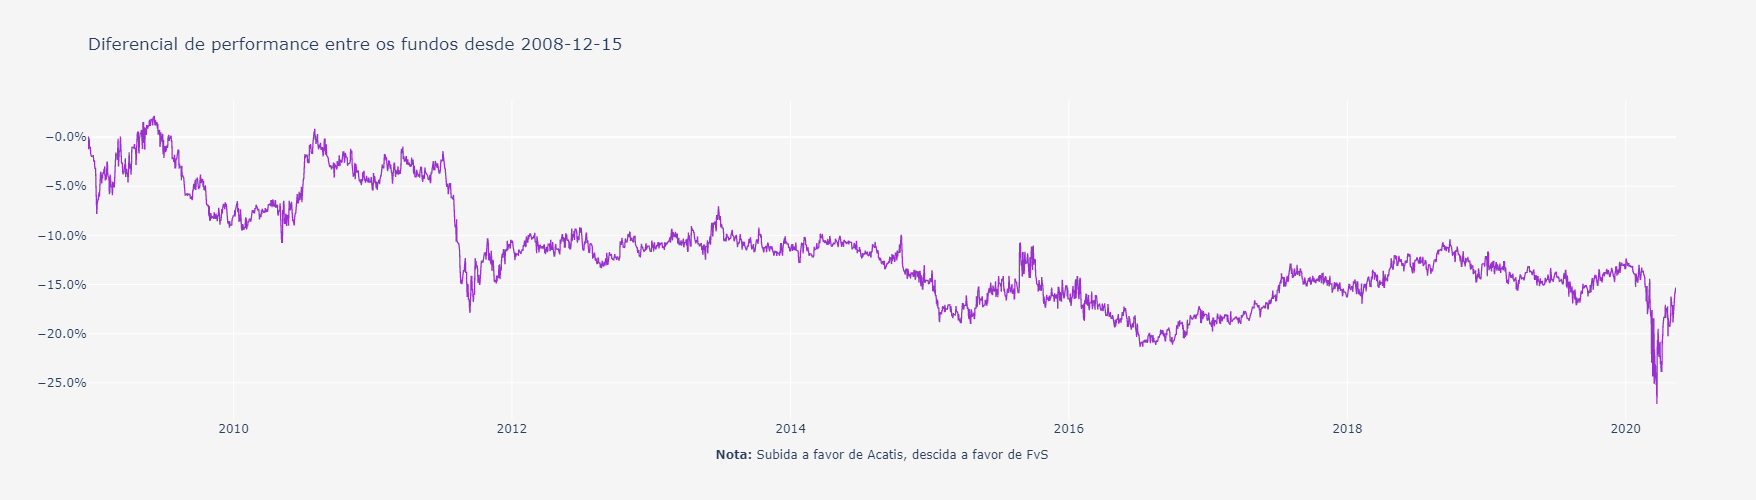

In [9]:
layout = go.Layout(
    title='Diferencial de performance entre os fundos desde ' + Begin,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='<b>Nota:</b> Subida a favor de ' + fundos.columns[0] + ', descida a favor de ' + fundos.columns[1],
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        zeroline=True, # Adicionar ou não a zero line
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = fundos.index,
    y = (round(((fundos.iloc[:, 0]/fundos.iloc[:, 1])- 1), 5)),
    name = 'Portfolio',
    line = dict(
        color = 'darkorchid',
        width = 1.3)
)

data = [trace0]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

##### O diferencial quase todo veio no Verão de 2011

In [11]:
pa.print_title('Performance dos fundos desde ' + Begin)
pa.compute_performance_table(fundos)

**Performance dos fundos desde 2008-12-15**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Acatis,9.27%,174.99%,7.79%,1.19,-25.83%,0.36
FvS,10.88%,225.28%,7.23%,1.51,-15.28%,0.71


In [12]:
pa.print_title('Performance do ' + fundos.columns[0])
pa.compute_ms_performance_table(pd.DataFrame(fundos.iloc[:, 0]))

**Performance do Acatis**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,9.27%,174.99%,7.79%,1.19,-25.83%,0.36
YTD,N/A,-4.33%,26.69%,-0.43,-25.83%,-0.44
1 Year,N/A,5.13%,16.90%,0.30,-25.83%,0.20
3 Years,5.07%,16.03%,10.23%,0.50,-25.83%,0.20
5 Years,4.62%,25.36%,9.36%,0.49,-25.83%,0.18
10 Years,6.75%,92.30%,7.81%,0.86,-25.83%,0.26


In [13]:
pa.print_title('Performance do ' + fundos.columns[1])
pa.compute_ms_performance_table(pd.DataFrame(fundos.iloc[:, 1]))

**Performance do FvS**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,10.88%,225.28%,7.23%,1.51,-15.28%,0.71
YTD,N/A,-1.99%,13.49%,-0.40,-15.28%,-0.35
1 Year,N/A,6.80%,9.05%,0.75,-15.28%,0.44
3 Years,4.37%,13.72%,6.51%,0.67,-15.28%,0.29
5 Years,4.22%,23.00%,7.19%,0.59,-15.28%,0.28
10 Years,7.82%,112.56%,6.99%,1.12,-15.28%,0.51


- **CAGR:** Retorno geométrico anualizado do portfolio;
- **StdDev:** Desvio padrão anualizado do portfolio (quanto mais alto mais risco tem a carteira);
- **Sharpe:** CAGR/StdDev (quanto mais alto melhor);
- **Max DD:** Maior queda do portfolio;
- **MAR:** CAGR/Max DD (quanto mais alto melhor).

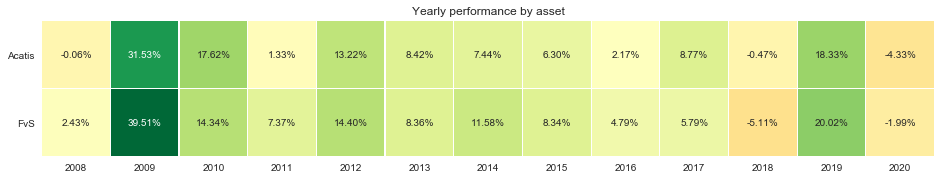

In [25]:
fundos_norm = fundos.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([yearly_quotes_fundos.iloc[:1], yearly_quotes_fundos])
yearly_quotes_fundos = pd.concat([pd.DataFrame(fundos_norm.iloc[0]).transpose(), yearly_quotes_fundos.iloc[1:]])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Calcular em valores percentuais
yearly_returns_fundos = yearly_returns_fundos / 100

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(16, 2.5)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0.02, fmt='.2%')
plt.yticks(rotation=360)
plt.title('Yearly performance by asset')
plt.show()

In [15]:
pa.print_title('Drawdown Table de ' + fundos.iloc[:, 0].name)
pa.compute_drawdowns_table(fundos.iloc[:, 0])

**Drawdown Table de Acatis**

,Begin,End,Depth,Length
1,2020-02-12,NaT,-25.83%,"0 Years, 3 Months, 0 Days"
2,2011-07-07,2012-01-27,-11.38%,"0 Years, 6 Months, 20 Days"
3,2015-07-20,2016-12-19,-10.56%,"1 Years, 4 Months, 29 Days"
4,2009-01-07,2009-04-02,-8.04%,"0 Years, 2 Months, 26 Days"
5,2018-09-27,2019-03-29,-7.98%,"0 Years, 6 Months, 2 Days"


In [17]:
pa.print_title('Drawdown Table de ' + fundos.iloc[:, 1].name)
pa.compute_drawdowns_table(fundos.iloc[:, 1])

**Drawdown Table de FvS**

,Begin,End,Depth,Length
1,2020-02-23,NaT,-15.28%,"0 Years, 2 Months, 19 Days"
2,2009-01-07,2009-05-04,-14.29%,"0 Years, 3 Months, 27 Days"
3,2015-04-16,2016-07-12,-12.35%,"1 Years, 2 Months, 26 Days"
4,2018-01-24,2019-02-21,-7.39%,"1 Years, 0 Months, 28 Days"
5,2013-05-23,2014-02-27,-7.07%,"0 Years, 9 Months, 4 Days"


In [18]:
# Turning daily quotes into monthly
Portfolio_M = fundos.resample('BM').last()
# Monthly returns
Portfolio_ret_M = Portfolio_M.pct_change()

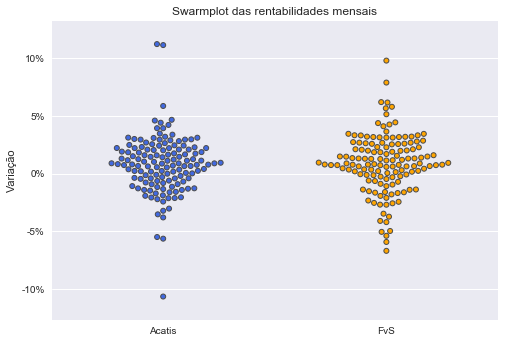

In [19]:
my_pal = ["royalblue", "orange", "dimgrey"]

ax = sns.swarmplot(data=Portfolio_ret_M, orient='v', linewidth=1,  palette=my_pal)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax.set_title("Swarmplot das rentabilidades mensais")
ax.set_xlabel('')
ax.set_ylabel('Variação')
plt.show()

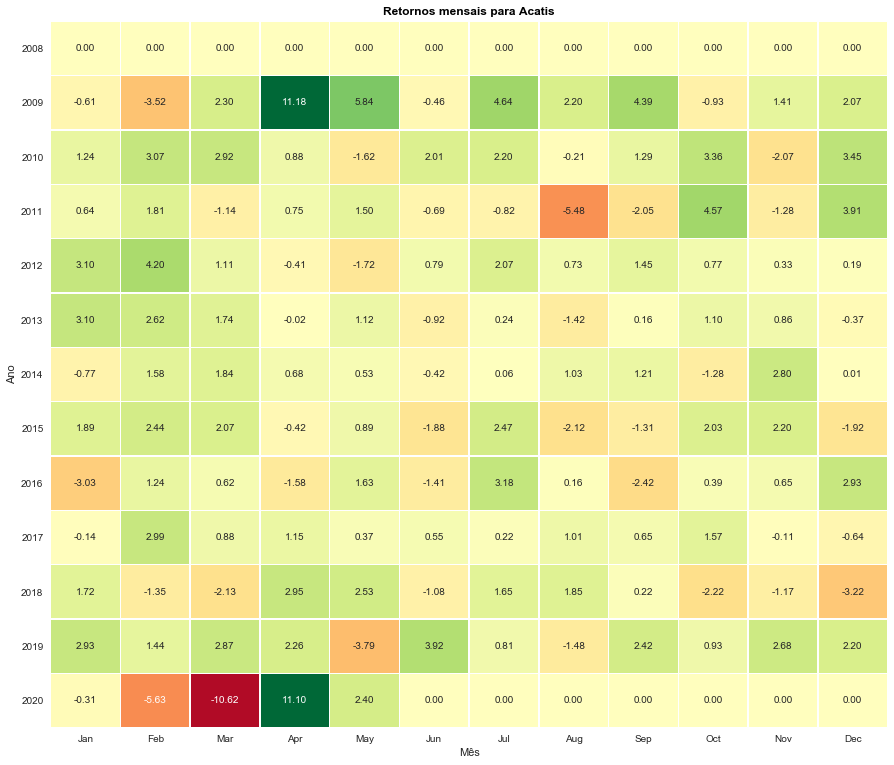

In [21]:
# Compute monthly returns table
nr = 0

pa.plot(fundos.iloc[:, nr], title= 'Retornos mensais para ' + fundos.iloc[:, nr].name , figsize=(15, len(np.unique(fundos.index.year))))

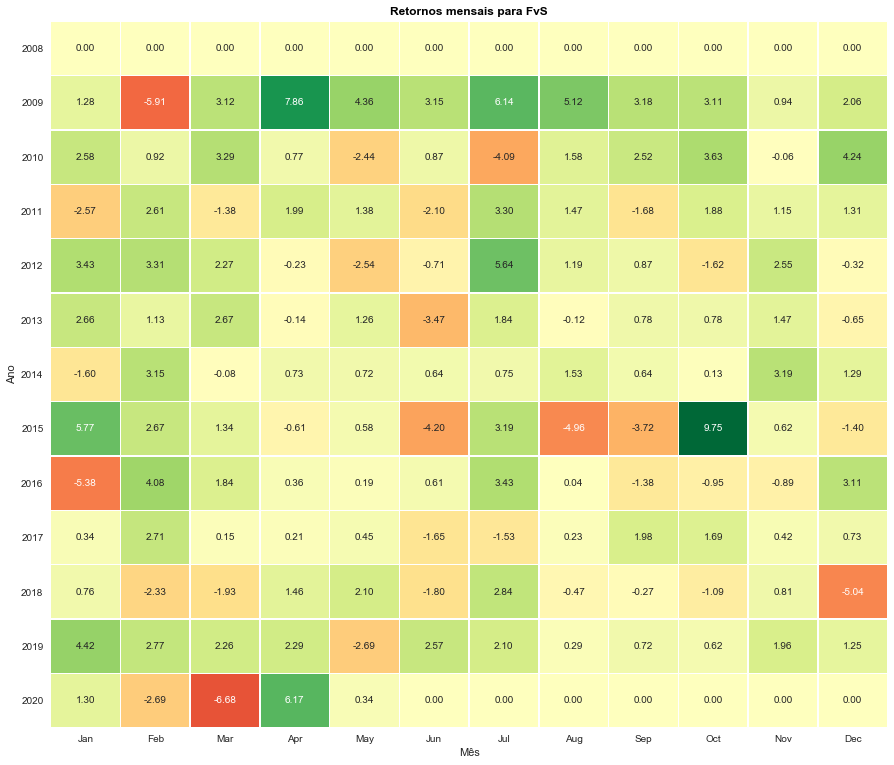

In [22]:
# Compute monthly returns table
nr = 1

pa.plot(fundos.iloc[:, nr], title= 'Retornos mensais para ' + fundos.iloc[:, nr].name , figsize=(15, len(np.unique(fundos.index.year))))

In [23]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF